<a href="https://colab.research.google.com/github/nikitakandpal/ML-projects/blob/main/Song_popularity_predictive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting the popularity of the song is the main objective.

The project is simple yet challenging: predicting the popularity of a song based on factors such as energy, acoustic qualities, instrumentation, liveliness, danceability, etc. The dataset is large, and its complexity arises from the strong multicollinearity present.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv("song_data.csv")

Q1. Summarizing the data

In [37]:
data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


We have uniformm values for all the features so no need to handle missing values by removing or adding values.

How much data is present?

In [5]:
rows, columns = data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 18835
Number of columns: 15


So we have summarized that the amount of data present in the Song data is as retured by data.shape

18835 rows × 15 columns

In [6]:
for col in data.columns:
  print(col, ':',len(data[col].unique()), 'labels')

song_name : 13070 labels
song_popularity : 101 labels
song_duration_ms : 11771 labels
acousticness : 3209 labels
danceability : 849 labels
energy : 1132 labels
instrumentalness : 3925 labels
key : 12 labels
liveness : 1425 labels
loudness : 8416 labels
audio_mode : 2 labels
speechiness : 1224 labels
tempo : 12112 labels
time_signature : 5 labels
audio_valence : 1246 labels


The list of continuous valued features are:
*   acousticness      18835 non-null  float64
*   danceability      18835 non-null  float64
*   energy            18835 non-null  float64
*   instrumentalness  18835 non-null  float64
*   liveness          18835 non-null  float64
*   loudness          18835 non-null  float64
*   speechiness       18835 non-null  float64
*   tempo             18835 non-null  float64
*   audio_valence     18835 non-null  float64

Since,

*   song_popularity (int64) has 101 labels
*   song_duration_ms (int64) has 11771 labels
We consider them as **continuous features**.





The list of categorical features are:
*   song_name         18835 non-null  object

Since,
*   key has only 12 labels
*   audio_mode has only 2 labels
*   time_signature has only 5 labels

We consider them as **categorical features** as we can categorize them under these countable values.







Q2 Statistical Values

In [7]:
statistics = data.describe()
print(statistics)

       song_popularity  song_duration_ms  acousticness  danceability  \
count     18835.000000      1.883500e+04  18835.000000  18835.000000   
mean         52.991877      2.182116e+05      0.258539      0.633348   
std          21.905654      5.988754e+04      0.288719      0.156723   
min           0.000000      1.200000e+04      0.000001      0.000000   
25%          40.000000      1.843395e+05      0.024100      0.533000   
50%          56.000000      2.113060e+05      0.132000      0.645000   
75%          69.000000      2.428440e+05      0.424000      0.748000   
max         100.000000      1.799346e+06      0.996000      0.987000   

             energy  instrumentalness           key      liveness  \
count  18835.000000      18835.000000  18835.000000  18835.000000   
mean       0.644995          0.078008      5.289196      0.179650   
std        0.214101          0.221591      3.614595      0.143984   
min        0.001070          0.000000      0.000000      0.010900   
25%   

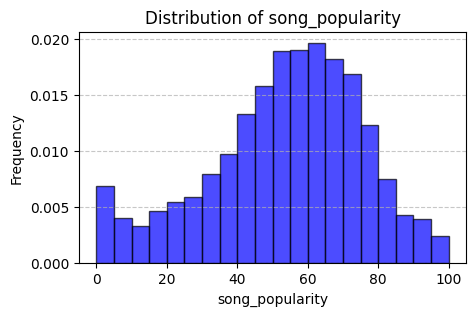

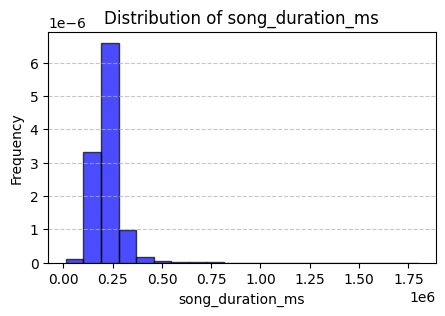

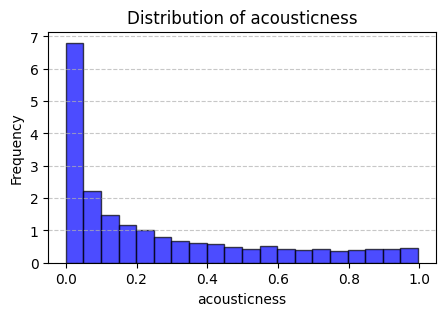

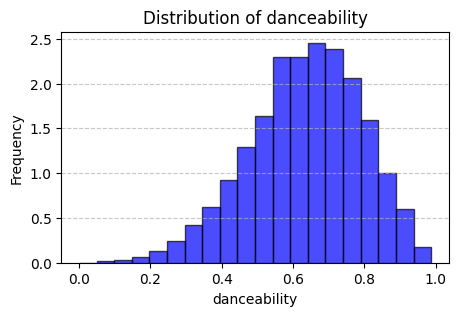

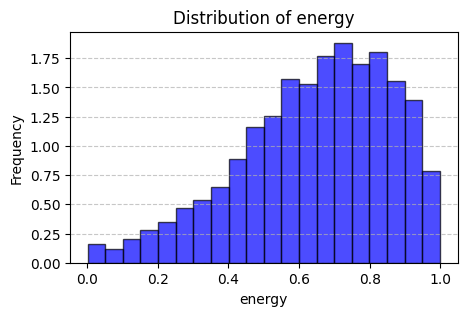

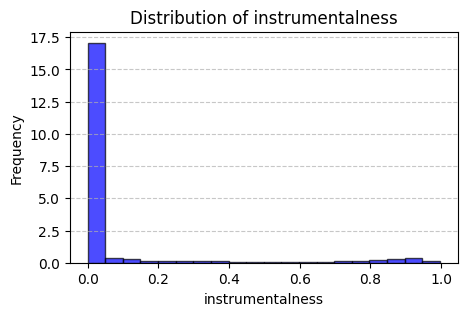

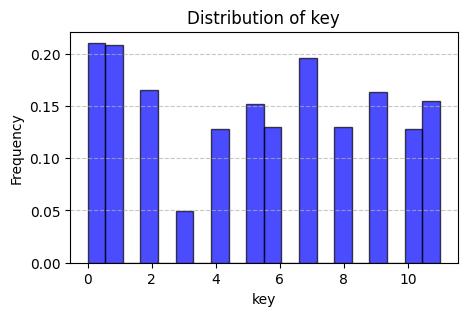

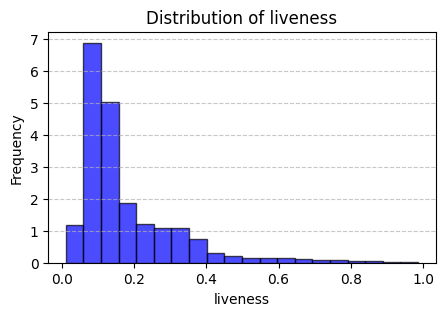

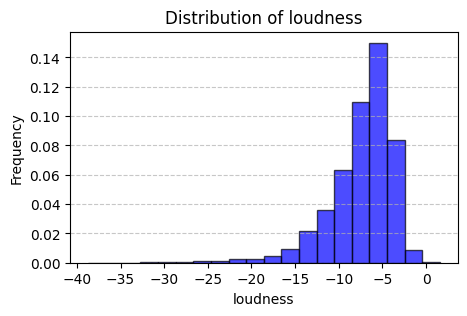

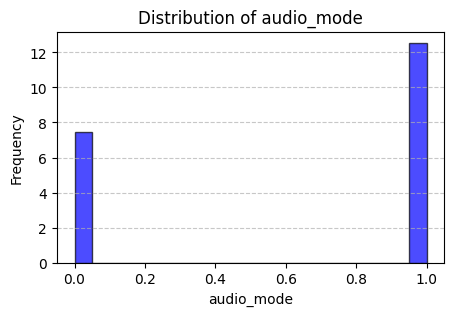

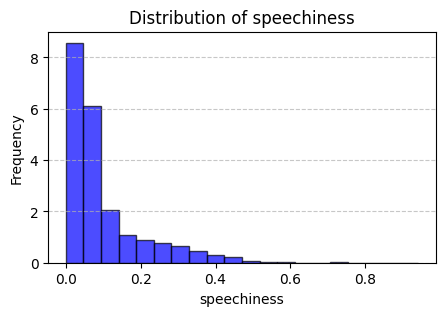

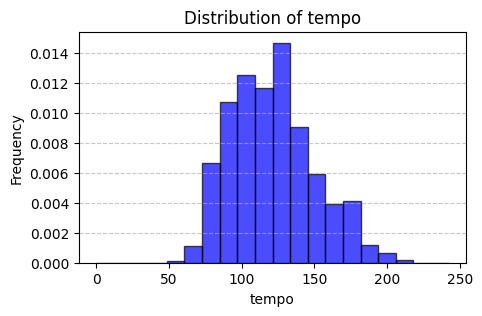

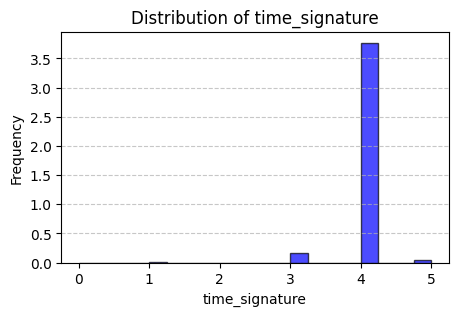

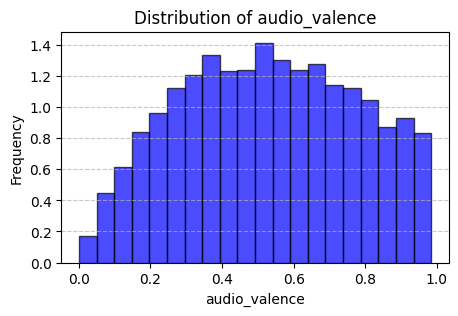

In [8]:
for column in data.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(5, 3))
    plt.hist(data[column], bins=20, density=True, alpha=0.7, color='b', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

array([[<Axes: title={'center': 'song_popularity'}>,
        <Axes: title={'center': 'song_duration_ms'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'audio_mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'audio_valence'}>, <Axes: >, <Axes: >]],
      dtype=object)

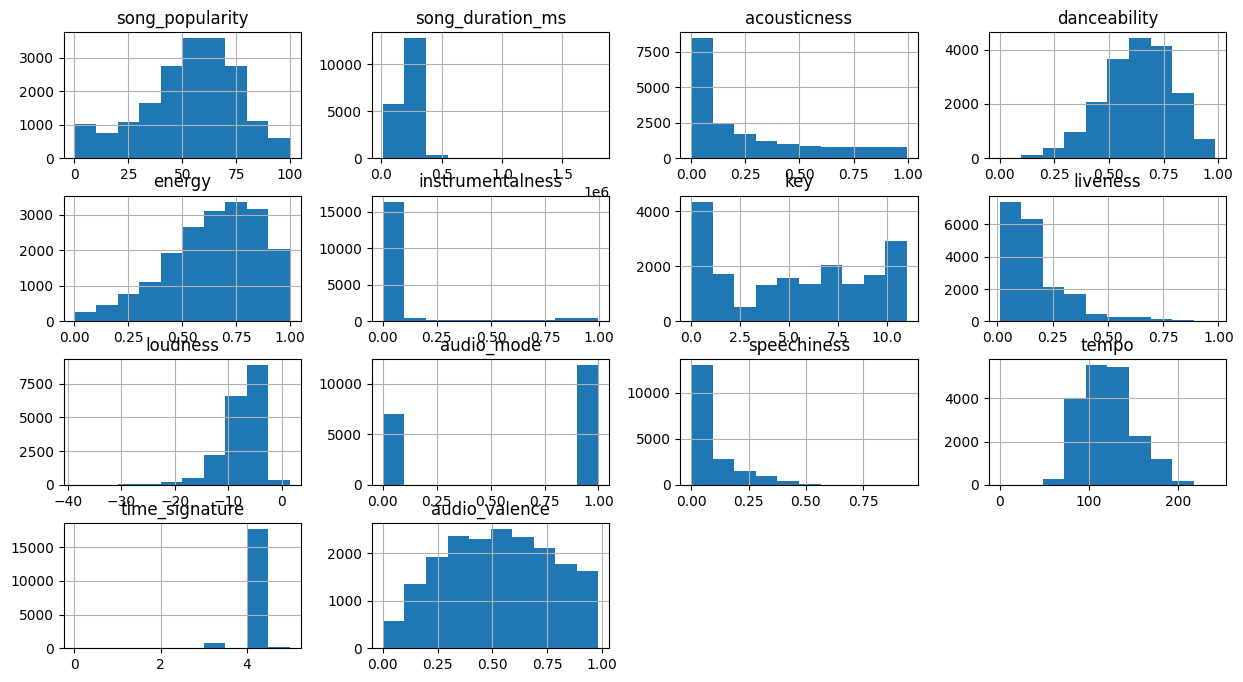

In [9]:
data.hist(figsize=(15,8))

We require special treatment in removing the duplicate songs, and we sort the data in descending order of song populatrity.

In [12]:
data = data.drop_duplicates(subset='song_name')
data = data.sort_values('song_popularity', ascending=False)

In [16]:
data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
4299,Happier,100,214289,0.1910,0.687,0.792,0.000000,5,0.1670,-2.749,1,0.0452,100.015,4,0.671
1229,I Love It (& Lil Pump),99,127946,0.0114,0.901,0.522,0.000000,2,0.2590,-8.304,1,0.3300,104.053,4,0.329
4329,Promises (with Sam Smith),98,213309,0.0119,0.781,0.768,0.000005,11,0.3250,-5.991,1,0.0394,123.070,4,0.486
4302,Eastside (with Halsey & Khalid),98,173799,0.5550,0.560,0.680,0.000000,6,0.1160,-7.648,0,0.3210,89.391,4,0.319
61,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98,212500,0.1530,0.841,0.798,0.000003,1,0.0618,-4.206,0,0.2290,95.948,4,0.591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16779,I'm a Slave 4 U,0,203760,0.4260,0.843,0.843,0.000108,8,0.1110,-3.573,1,0.1170,110.030,4,0.963
8688,Hard Work Pays Off,0,224506,0.3270,0.736,0.482,0.000000,4,0.2290,-8.242,1,0.1960,140.064,4,0.608
3435,Coupe (feat. Rich The Kid),0,194632,0.0520,0.843,0.643,0.000000,11,0.0973,-8.420,1,0.2170,150.033,4,0.851
8940,Jet Lag (feat. Young Scooter),0,271066,0.2660,0.810,0.458,0.000000,4,0.1740,-7.495,0,0.1050,125.049,4,0.493


We can see that after removing duplicate songs the number of rows reduced to 13070 and the songs are arranged in descending order of their popularity.

Now we check if there are any null values for any rows for feature and if
*   we want to remove those rows
*   get rid of whole attribute
*   set missing value to some value (0,mean,median)

In [20]:
data.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

There are no null values for any feature.


Q3. Computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

We will now check if all parameters are significant or not, and if not, we will only select the significant ones.

In [21]:
data.corr()

<ipython-input-21-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_popularity,1.000000,-0.006965,-0.037154,0.052140,-0.012476,-0.091087,-0.000396,-0.034760,0.051184,0.000216,-0.000436,-0.026940,0.021449,-0.049775
song_duration_ms,-0.006965,1.000000,-0.121959,-0.085902,0.105677,-0.026923,-0.004156,0.023539,0.035422,-0.025588,-0.080819,0.017090,0.004168,-0.068409
acousticness,-0.037154,-0.121959,1.000000,-0.179665,-0.680703,0.186305,-0.001455,-0.089876,-0.572433,0.060194,-0.091555,-0.147054,-0.156349,-0.122776
danceability,0.052140,-0.085902,-0.179665,1.000000,0.063848,-0.127092,0.010822,-0.094310,0.181657,-0.100492,0.203907,-0.126737,0.139104,0.351737
energy,-0.012476,0.105677,-0.680703,0.063848,1.000000,-0.231004,0.016328,0.177608,0.770288,-0.048334,0.077742,0.181354,0.147634,0.312207
instrumentalness,-0.091087,-0.026923,0.186305,-0.127092,-0.231004,1.000000,-0.011115,-0.043846,-0.405287,-0.016623,-0.082353,-0.045582,-0.064888,-0.201873
key,-0.000396,-0.004156,-0.001455,0.010822,0.016328,-0.011115,1.000000,-0.003503,0.009943,-0.176612,0.027106,-0.006665,-0.012019,0.025762
liveness,-0.034760,0.023539,-0.089876,-0.094310,0.177608,-0.043846,-0.003503,1.000000,0.115486,-0.006903,0.089412,0.025983,0.011597,0.014258
loudness,0.051184,0.035422,-0.572433,0.181657,0.770288,-0.405287,0.009943,0.115486,1.000000,-0.057121,0.083615,0.142247,0.114710,0.213695
audio_mode,0.000216,-0.025588,0.060194,-0.100492,-0.048334,-0.016623,-0.176612,-0.006903,-0.057121,1.000000,-0.113466,0.024126,-0.024524,0.000384


<ipython-input-34-2f96a68d813f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")


<Axes: >

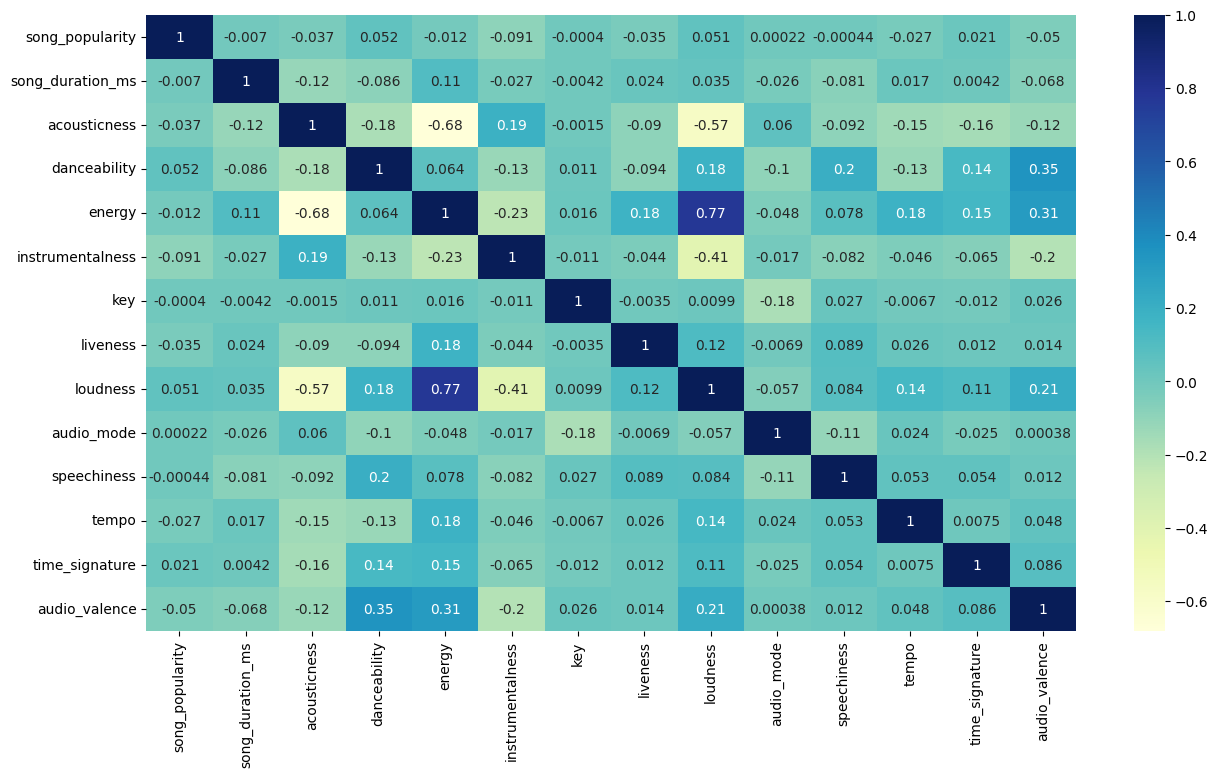

In [34]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

We see, that every parameter is significant, but "loudness" parameter is strange, because of good correlation with some parameters. Now let see distributions of parameters to filter "bad distributed" parameters.

We see that popularity of a song has the highest correlation with the song danceability.

There may also be a correlation between the popularity of a song and its loudness.

Reshape the data for interpretation!

In [ ]:
x = data['danceability'].values
y = data['tempo'].values
print(f'Song Danceability: {x}')
print(f'Song Tempo: {y}')

In [ ]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
print(f' Danceability reshaped: {x}')
print(f'Tempo reshaped: {y}')

Data Conclusions:
1. There may be a correlation between the danceability of a song and its popularity, which can potentially be established through a linear regression analysis.
2. The popularity of a song could be influenced by its danceability.
3. Songs with a faster tempo, measured in beats per minute (BPM), may have a positive correlation with their popularity, suggesting that listeners may prefer songs with a higher tempo.

Conclusion 1/3:
Songs that are more compatible with dancing are slightly rated higher than songs aren't danceable.

Hypothesis: If songs are danceable, then humans will likely rate the songs higher than others, because of the psycological effects it has on our mood.